## Multiple Linear Regression

#### Step1: Feature extraction

#### Step2: Feature extraction

In [1]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import seaborn as seabornInstance

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('ex1data2.txt', header=None)
#data.shape[0]

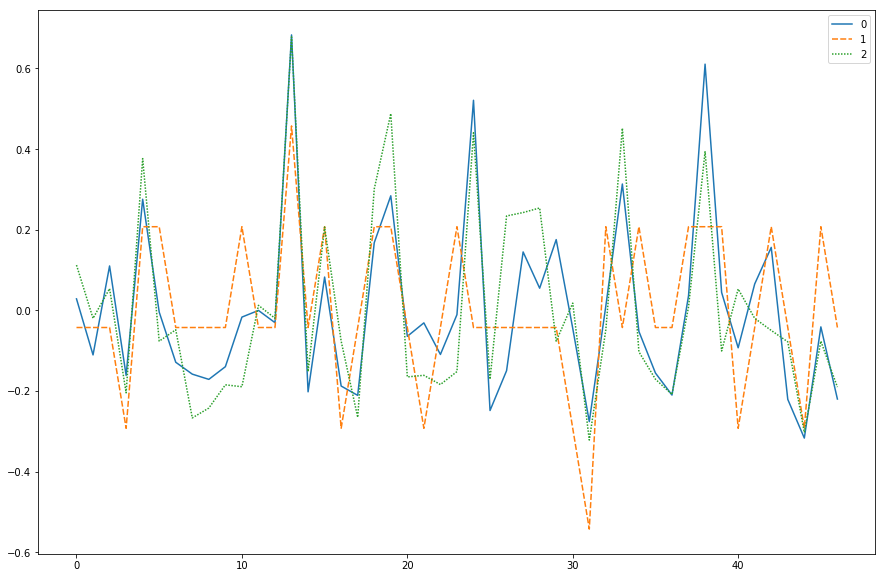

In [3]:
##Normalize Data
data[0] = (data[0] - data[0].mean())/(data[0].max() - data[0].min())
data[1] = (data[1] - data[1].mean())/(data[1].max() - data[1].min())
data[2] = (data[2] - data[2].mean())/(data[2].max() - data[2].min())
#data
plot.figure(figsize=(15,10))
seabornInstance.lineplot(data=data)

In [4]:
X_mat = np.insert(np.array(data)[:,:2], 0, 1, axis=1)
Theta = np.zeros(X_mat.shape[1]).reshape(3,1)
Y_mat = np.array(data[2]).reshape(47,1)
rate = 0.1
num_iteration = 2500

In [5]:
def hypothesis(X_mat, Theta):
    return(np.dot(X_mat, Theta))

def MSE_cost(Theta, X_mat, Y_mat):
    return(np.sum((hypothesis(X_mat,Theta) - Y_mat)**2) / (2*X_mat.shape[0]))

def gradient(Theta, X_mat, Y_mat, rate):
    return(Theta - np.dot(X_mat.T, (hypothesis(X_mat, Theta) - Y_mat)) * (rate/X_mat.shape[0]))

def normalization(X_mat, Y_mat):
    return(np.dot(np.dot(np.linalg.inv(np.dot(X_mat.T, X_mat)),X_mat.T), Y_mat))
    

In [6]:
np.dot(X_mat[0],normalization(X_mat, Y_mat))

array([0.02994425])

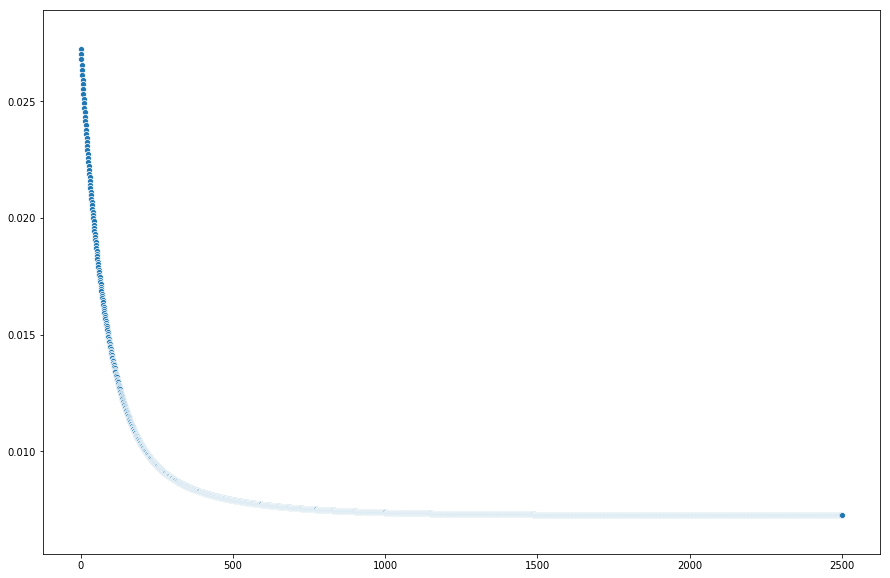

In [7]:
cost_array = []
for i in range(num_iteration):
    cost = MSE_cost(Theta, X_mat, Y_mat)
    Theta = gradient(Theta, X_mat, Y_mat, rate)
    cost_array.append(cost)

plot.figure(figsize=(15,10))
seabornInstance.scatterplot(x=range(len(cost_array)), y=cost_array)

In [8]:
np.dot(X_mat[0],Theta)

array([0.02955063])